<h1>Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

<h1> Files </h1>

In [2]:
regular_season = pd.read_csv("Data_regular_season.csv")
playoffs = pd.read_csv("Data_playoffs.csv")

<h2>Overview</h2>

In [3]:
regular_season.set_index("Player",inplace=True)
playoffs.set_index("Player",inplace=True)

In [4]:
totals = pd.Series(regular_season.sum(axis=1)+playoffs.sum(axis=1))
totals.head()

Player
LeBron         68369
MJ             56129
Kareem         75511
Kobe           57833
Karl_Malone    68200
dtype: int64

<h1> Q1- Is there a strong relationship between points, rebounds and total_score ? </h1>

In [5]:
lm = LinearRegression(normalize=True)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

<h2> Independent and dependent variables </h2>

In [6]:
X = regular_season[["Points","Rebounds"]]+playoffs[["Points","Rebounds"]]
Y = totals
Y.head(10)

Player
LeBron         68369
MJ             56129
Kareem         75511
Kobe           57833
Karl_Malone    68200
Wilt           68179
Shaq           57108
Duncan         59388
Dirk           54938
Hakeem         56058
dtype: int64

<h5>Fitting the created model </h5>

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

<h5> Test: predicting values </h5>

In [8]:
Yhat = lm.predict(X)
Yhat[0:5]

array([64191.45894682, 57173.41672054, 73226.02468288, 58605.00864471,
       68156.29158081])

<h2> Plotting the LR model for predicting totals based on points </h2>

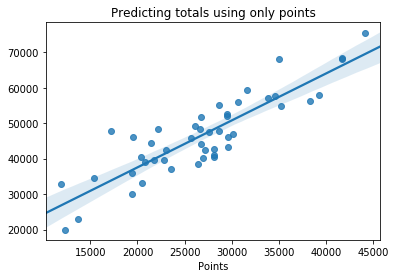

In [9]:
plt.figure()
plt.title("Predicting totals using only points")
plt.xlabel("Points and Rebounds")
plt.ylabel("Totals")
sns.regplot(x=X["Points"],y=Y,data=regular_season)
plt.show()

<h2> Plotting the LR model for predicting totals based on rebounds </h2>

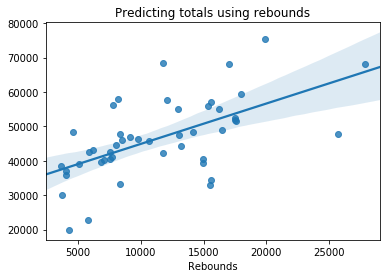

In [10]:
plt.figure()
plt.title("Predicting totals using rebounds")
plt.xlabel("Points and Rebounds")
plt.ylabel("Totals")
sns.regplot(x=X["Rebounds"],y=Y,data=regular_season)
plt.show()

<h2> Using points AND rebounds : <i> distribution plot </i> </h2>

Coefs = [1.16671463 0.76084923] 
Intercepts = 6559.863038441217

Yhat = 6559.863038441217 + 1.1667146305175635*Points + 0.760849225526678*Rebounds

For example, a player with 38.000 points and 7800 rebounds must likely have 56830.0


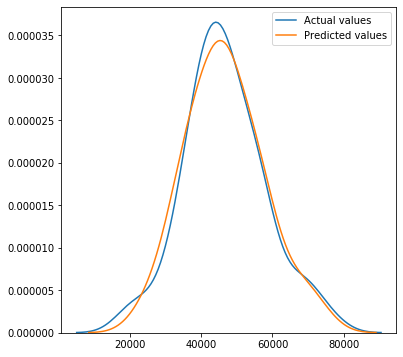

In [11]:
print(f"Coefs = {lm.coef_} ")
print(f"Intercepts = {lm.intercept_}")
print(f"\nYhat = {lm.intercept_} + {lm.coef_[0]}*Points + {lm.coef_[1]}*Rebounds")

print(f"\nFor example, a player with 38.000 points and 7800 rebounds must likely have {round(lm.intercept_+lm.coef_[0]*38000+lm.coef_[1]*7800)}")

plt.figure(figsize=(6,6))
sns.distplot(Y,label="Actual values",hist=False)
sns.distplot(Yhat,label="Predicted values",hist=False)
plt.show()

<center>  <span style="color: blue; border: 1px solid black; padding: 3px;"> 
    <i> Yhat = 6559.863038441217 + 1.1.1667146305175635*X1 + 0.760849225526678*X2 </i> </span> <br> <br>
    <span style="color: blue; border: 1px solid black; padding: 3px"><i> Yhat = 6559.863038441217 + 1.1.1667146305175635*Points + 0.760849225526678*Rebounds </i> </span> </center>

<h2> Test set and train test split </h2>

In [12]:
from sklearn.model_selection import train_test_split

<h3>Parameters</h3>
<ul>
    <li>Train size: 85%</li>
    <li>Test size: 15%</li>
</ul>

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.15,random_state=1)

In [14]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

<h3>R^2 score</h2>

In [15]:
print(f"Train set score: {lm.score(x_train,y_train)}")
print(f"Test set score: {lm.score(x_test,y_test)}")

Train set score: 0.8727745642264242
Test set score: 0.9717616034917983


<center> <span style="color: green; text-size: 24px;"> Our model tends not to overfit nor underfit.
    However, since we do not have sufficient test data, let's perform cross-validation
    </span> </center>

<h2> Cross-validation </h2>

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [17]:
Rcross = cross_val_score(lm,X,Y,cv=3)
Rcross

array([0.68678567, 0.8781208 , 0.79613731])

In [18]:
print(f"The mean of the folds is {Rcross.mean()} and the standard derivation is {Rcross.std()}")
print(f"The accuracy of our model using cross validation with 3 folds is {round(Rcross.mean()*100)}%")

The mean of the folds is 0.7870145947090598 and the standard derivation is 0.07837815020782682
The accuracy of our model using cross validation with 3 folds is 79.0%


In [19]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
Yhat_train = lm.predict(x_train)
Yhat_train[0:5]

array([43429.06943216, 45092.83925395, 49495.00842899, 42757.1575792 ,
       36704.41239096])

In [21]:
Yhat_test = lm.predict(x_test)
Yhat_test[0:5]

array([40419.06949115, 35117.8397808 , 37373.12600256, 42502.58705713,
       72311.01843762])

In [22]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

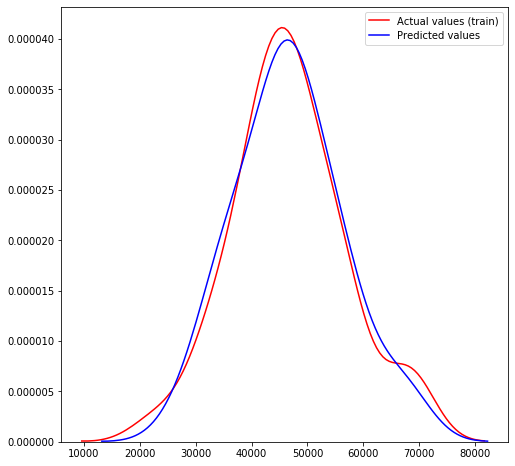

In [23]:
DistributionPlot(y_train,Yhat_train,"Actual values (train)", "Predicted values", "")

<h3> Our model seems to be very close to the actual values, within the [50k;60k] ranges with the training set </h3>

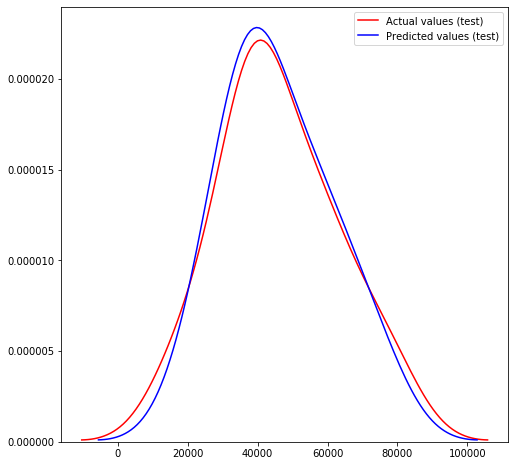

In [24]:
DistributionPlot(y_test,Yhat_test,"Actual values (test)","Predicted values (test)","")

<h3> Our model seems to be very close to the actual values within the [50k;67k] range  <br>
</h3>